## Measuring Similarity using Jaccard Similarity

In [1]:
target_dic ={
'target1' : 'He took off his clothes, stopped and put on his wollen pajamas.',
'target2' : 'He was wearing his wollen pajamas when he opened the door.',
'target3' : 'He likes to sleep in shorts, but I prefer to wear wollen pajamas.',
'target4' : 'When I stopped by this morning, Tom was still in his cotton pajamas',
'target5' : 'He wears pants and wollen pajamas at night. Tom stopped to open door',
'target6' : 'He is a great guy in wollen pajamas and he carries a pen in his hand.'
}

In [2]:
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords

In [3]:
tknzr = TweetTokenizer()

In [4]:
tokenize_target =[]
keys =target_dic.keys()
for key in keys:
   target_dic[key] = tknzr.tokenize(target_dic[key])
print (target_dic)

{'target1': ['He', 'took', 'off', 'his', 'clothes', ',', 'stopped', 'and', 'put', 'on', 'his', 'wollen', 'pajamas', '.'], 'target2': ['He', 'was', 'wearing', 'his', 'wollen', 'pajamas', 'when', 'he', 'opened', 'the', 'door', '.'], 'target3': ['He', 'likes', 'to', 'sleep', 'in', 'shorts', ',', 'but', 'I', 'prefer', 'to', 'wear', 'wollen', 'pajamas', '.'], 'target4': ['When', 'I', 'stopped', 'by', 'this', 'morning', ',', 'Tom', 'was', 'still', 'in', 'his', 'cotton', 'pajamas'], 'target5': ['He', 'wears', 'pants', 'and', 'wollen', 'pajamas', 'at', 'night', '.', 'Tom', 'stopped', 'to', 'open', 'door'], 'target6': ['He', 'is', 'a', 'great', 'guy', 'in', 'wollen', 'pajamas', 'and', 'he', 'carries', 'a', 'pen', 'in', 'his', 'hand', '.']}


In [5]:
#Removing stop words
filtered_tweet_list=[]
stop_words = stopwords.words('english')
'''for key in keys:
    for current_list in target_dic[key]:
        temp_list=[]
        for word in current_list:
            print ("Inside word",word)
            if word not in stop_words:
                temp_list.append(word)
    filtered_tweet_list.append(temp_list)'''

for key in keys:
    temp_list=[]
    for words in target_dic[key]:
        if words not in stop_words:
            #print("inside if")
            temp_list.append(words)
    filtered_tweet_list.append(temp_list)    

print(filtered_tweet_list)


[['He', 'took', 'clothes', ',', 'stopped', 'put', 'wollen', 'pajamas', '.'], ['He', 'wearing', 'wollen', 'pajamas', 'opened', 'door', '.'], ['He', 'likes', 'sleep', 'shorts', ',', 'I', 'prefer', 'wear', 'wollen', 'pajamas', '.'], ['When', 'I', 'stopped', 'morning', ',', 'Tom', 'still', 'cotton', 'pajamas'], ['He', 'wears', 'pants', 'wollen', 'pajamas', 'night', '.', 'Tom', 'stopped', 'open', 'door'], ['He', 'great', 'guy', 'wollen', 'pajamas', 'carries', 'pen', 'hand', '.']]


In [7]:
#Removing the special characters and changing  to lower case
import re
for i in range (0, len(filtered_tweet_list)):
    for j in range (0, len(filtered_tweet_list[i])):
        filtered_tweet_list[i][j] = re.sub(r"[^a-zA-Z0-9]+", '', filtered_tweet_list[i][j])
        filtered_tweet_list[i][j] = filtered_tweet_list[i][j].lower()

In [8]:
#Removing blank spaces
final_tweet=[]
for cur_list in filtered_tweet_list:
    temp_list=[]
    temp_list = [w for w in cur_list if w]
    final_tweet.append(temp_list)
print(final_tweet)

[['he', 'took', 'clothes', 'stopped', 'put', 'wollen', 'pajamas'], ['he', 'wearing', 'wollen', 'pajamas', 'opened', 'door'], ['he', 'likes', 'sleep', 'shorts', 'i', 'prefer', 'wear', 'wollen', 'pajamas'], ['when', 'i', 'stopped', 'morning', 'tom', 'still', 'cotton', 'pajamas'], ['he', 'wears', 'pants', 'wollen', 'pajamas', 'night', 'tom', 'stopped', 'open', 'door'], ['he', 'great', 'guy', 'wollen', 'pajamas', 'carries', 'pen', 'hand']]


In [10]:
#Applying WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

In [11]:
tagged_tweets=[]
for cur_lst in final_tweet:
    tagged_tweets.append(pos_tag(cur_lst))
print(tagged_tweets)

[[('he', 'PRP'), ('took', 'VBD'), ('clothes', 'NNS'), ('stopped', 'VBD'), ('put', 'VB'), ('wollen', 'CD'), ('pajamas', 'NN')], [('he', 'PRP'), ('wearing', 'VBG'), ('wollen', 'JJ'), ('pajamas', 'NN'), ('opened', 'VBD'), ('door', 'NN')], [('he', 'PRP'), ('likes', 'VBZ'), ('sleep', 'JJ'), ('shorts', 'NNS'), ('i', 'NN'), ('prefer', 'VBP'), ('wear', 'JJ'), ('wollen', 'CD'), ('pajamas', 'NN')], [('when', 'WRB'), ('i', 'NN'), ('stopped', 'VBD'), ('morning', 'NN'), ('tom', 'NN'), ('still', 'RB'), ('cotton', 'VBZ'), ('pajamas', 'NN')], [('he', 'PRP'), ('wears', 'VBZ'), ('pants', 'NNS'), ('wollen', 'WRB'), ('pajamas', 'NN'), ('night', 'NN'), ('tom', 'NN'), ('stopped', 'VBD'), ('open', 'JJ'), ('door', 'NN')], [('he', 'PRP'), ('great', 'JJ'), ('guy', 'JJ'), ('wollen', 'NN'), ('pajamas', 'NN'), ('carries', 'VBZ'), ('pen', 'JJ'), ('hand', 'NN')]]


In [12]:
wnlm = WordNetLemmatizer()
def convert_big_tags(t):
    if t=='vbd' or t=='vbg' or t=='vbz' or t=='vbp' or t=='vbn':
        return 'v'
    elif t == 'jj' or t == 'jjr' or t=='jjs':
        return 'a'
    elif t == 'rb' or t=='rbr' or t=='rbs':
        return 'r'
    else:
        return 'n'
lemmatized_tweets=[]
for cur_tweet in tagged_tweets:
    temp_tweets=[]
    for word in cur_tweet:
        new_tag = convert_big_tags(word[1].lower())
        output = wnlm.lemmatize(word[0], new_tag)
        temp_tweets.append(output)
    lemmatized_tweets.append(temp_tweets)
print(lemmatized_tweets)

[['he', 'take', 'clothes', 'stop', 'put', 'wollen', 'pajama'], ['he', 'wear', 'wollen', 'pajama', 'open', 'door'], ['he', 'like', 'sleep', 'short', 'i', 'prefer', 'wear', 'wollen', 'pajama'], ['when', 'i', 'stop', 'morning', 'tom', 'still', 'cotton', 'pajama'], ['he', 'wear', 'pant', 'wollen', 'pajama', 'night', 'tom', 'stop', 'open', 'door'], ['he', 'great', 'guy', 'wollen', 'pajama', 'carry', 'pen', 'hand']]


In [13]:
#Joining elements of each list to create a new single list 
final_output = []
for ele in lemmatized_tweets:
    string_join = ' '.join(ele)
    final_output.append(string_join)
print(final_output)

['he take clothes stop put wollen pajama', 'he wear wollen pajama open door', 'he like sleep short i prefer wear wollen pajama', 'when i stop morning tom still cotton pajama', 'he wear pant wollen pajama night tom stop open door', 'he great guy wollen pajama carry pen hand']


In [14]:
keys= list(keys)
for i in range(0,len(final_output)):
    target_dic[keys[i]] = final_output[i]
target_dic

{'target1': 'he take clothes stop put wollen pajama',
 'target2': 'he wear wollen pajama open door',
 'target3': 'he like sleep short i prefer wear wollen pajama',
 'target4': 'when i stop morning tom still cotton pajama',
 'target5': 'he wear pant wollen pajama night tom stop open door',
 'target6': 'he great guy wollen pajama carry pen hand'}

In [44]:
def JaccardDistance(str1,str2):
    set1 = set(str1.split())
    set2 = set(str2.split())
    jaccardIndex = float(len(set1 & set2))/ len(set1 | set2)
    jaccardDist = 1-jaccardIndex
    return round(jaccardDist,2)

In [46]:
distance = []
for i in range(1,7):
    temp = []
    for j in range(1,7):
        if(i!=j):
            target1 = "target"+str(i)
            target2 = "target"+str(j)
            temp.append(JaccardDistance(target_dic[target1],target_dic[target2]))
        else:
            temp.append(0)
    distance.append(temp)
            
jaccardSimilarityMatrix=pd.DataFrame(distance, index = ['d1','d2','d3','d4','d5','d6'], columns= ['d1','d2','d3','d4','d5','d6'])
jaccardSimilarityMatrix

d1    d2    d3    d4    d5    d6
d1  0.00  0.70  0.77  0.85  0.69  0.75
d2  0.70  0.00  0.64  0.92  0.40  0.73
d3  0.77  0.64  0.00  0.87  0.73  0.79
d4  0.85  0.92  0.87  0.00  0.80  0.93
d5  0.69  0.40  0.73  0.80  0.00  0.80
d6  0.75  0.73  0.79  0.93  0.80  0.00

## Measuring Similarity using Cosine Similarity

In [18]:
#cosine
import re, math
import pandas as pd
from collections import Counter
vector_dict = {}

def load_docs():
    print ('.........Loading docs.....')
    doc1 = ('d1','Surrender this propensity for hindering other habits')
    doc2 = ('d2', 'Propensity dies on difficult')
    doc3 = ('d3', 'How easily we acquire bad habits dies')
    return [doc1,doc2,doc3]

def process_docs(all_dcs):
    #[('d1', 'Give up this habit of interrupting other'), ('d2', 'Habit dies hard.'),
    #('d3', 'How easily we acquire bad habits dies')]
    stop_words = ['of','and','on','in','up','this','we','How']
    all_words = []
    counts_dict = {}
    for doc in all_dcs:
        words = [x.lower() for x in doc[1].split() if x not in stop_words]
        words_counted = Counter(words)
        #print("Words counted:",words_counted)
        unique_words =list(words_counted.keys())
        counts_dict[doc[0]] = words_counted
        #print ("Here",counts_dict)
        all_words = all_words + unique_words
        #print (all_words)
    n = len(counts_dict)
    df_count = Counter(all_words)
    #print ("**=>",counts_dict)
    compute_vector_len(counts_dict, n, df_count)
    

def compute_vector_len(doc_dict,no, df_counts):
    global vector_dict
    for doc_name in doc_dict:
        doc_words = doc_dict[doc_name].keys()
        #print ("**=>",doc_words)
        wd_tfidf_scores = {}
        for wd in list(set(doc_words)):
            #print ("**=>",wd)
            wds_cts = doc_dict[doc_name]
            #print ("**=>",wds_cts)
            wd_tf_idf = wds_cts[wd] * math.log(no / df_counts[wd], 10)
            #print ("**=>",wd_tf_idf)
            wd_tfidf_scores[wd] = round(wd_tf_idf, 4)
            #print ("**=>",wd_tfidf_scores)
        vector_dict[doc_name] =wd_tfidf_scores
    #print(vector_dict)
        
def get_cosine(text1,text2):
    vec1 = vector_dict[text1]
    vec2 = vector_dict[text2]
    intersection = set(vec1.keys()) & set(vec2.keys())
    numerator = sum([vec1[x] * vec2[x] for x in intersection])
    sum1 = sum([vec1[x] ** 2 for x in vec1.keys()])
    sum2 = sum([vec2[x] ** 2 for x in vec2.keys()])
    denominator = math.sqrt(sum1) * math.sqrt(sum2)
    if not denominator:
        return 0.0
    else:
        return round(float(numerator/ denominator), 3)

all_docs = load_docs()
#print (all_docs)
process_docs(all_docs)

for keys,value in vector_dict.items():print(keys,value)
    
cos_list = []
text1 = 'd1'
text2 = 'd2'
text3 = 'd3'

cosine = get_cosine(text1,text2)
#print(cosine)
cos_list.append(cosine)
cos_list.append(get_cosine(text1,text3))
cos_list.append(get_cosine(text3,text2))
print("\n")
print('Cosine: ', cos_list)

pairs=['d1-d2','d1-d3','d2-d3']

pd.DataFrame(cos_list, index=pairs, columns=['Cosine-Similarity'])

.........Loading docs.....
d1 {'surrender': 0.4771, 'other': 0.4771, 'propensity': 0.1761, 'hindering': 0.4771, 'habits': 0.1761, 'for': 0.4771}
d2 {'propensity': 0.1761, 'difficult': 0.4771, 'dies': 0.1761}
d3 {'bad': 0.4771, 'acquire': 0.4771, 'habits': 0.1761, 'dies': 0.1761, 'easily': 0.4771}


Cosine:  [0.058, 0.036, 0.067]


Cosine-Similarity
d1-d2              0.058
d1-d3              0.036
d2-d3              0.067

In [20]:
#cosine
import re, math
from collections import Counter
vector_dict = {}

def load_docs():
    print ('.........Loading docs.....')
    doc1 = ('d1','Surrender this propensity for hindering other habits')
    doc2 = ('d2', 'Propensity dies on difficult')
    doc3 = ('d3','How easily we acquire bad habits dies')
    #Variation of d3 document
    doc4 = ('d4','How straightforwardly we obtain bad routine pass away')
    doc5 = ('d5','What approach simply we acquire poor practice ends')
    doc6 = ('d6','Giving up the bad habits to acquire good ones')
    doc7 = ('d7','What method we learn simply ends in poor practice')
    doc8 = ('d8','How clear we are getting away from bad routine')
    
    return [doc1,doc2,doc3,doc4,doc5,doc6,doc7,doc8]

def process_docs(all_dcs):
    #[('d1', 'Give up this habit of interrupting other'), ('d2', 'Habit dies hard.'),
    #('d3', 'How easily we acquire bad habits dies')]
    stop_words = ['of','and','on','in','up','this','we','How','are']
    all_words = []
    counts_dict = {}
    for doc in all_dcs:
        words = [x.lower() for x in doc[1].split() if x not in stop_words]
        words_counted = Counter(words)
        #print("Words counted:",words_counted)
        unique_words =list(words_counted.keys())
        counts_dict[doc[0]] = words_counted
        #print ("Here",counts_dict)
        all_words = all_words + unique_words
        #print (all_words)
    n = len(counts_dict)
    df_count = Counter(all_words)
    #print ("**=>",counts_dict)
    compute_vector_len(counts_dict, n, df_count)
    

def compute_vector_len(doc_dict,no, df_counts):
    global vector_dict
    for doc_name in doc_dict:
        doc_words = doc_dict[doc_name].keys()
        #print ("**=>",doc_words)
        wd_tfidf_scores = {}
        for wd in list(set(doc_words)):
            #print ("**=>",wd)
            wds_cts = doc_dict[doc_name]
            #print ("**=>",wds_cts)
            wd_tf_idf = wds_cts[wd] * math.log(no / df_counts[wd], 10)
            #print ("**=>",wd_tf_idf)
            wd_tfidf_scores[wd] = round(wd_tf_idf, 4)
            #print ("**=>",wd_tfidf_scores)
        vector_dict[doc_name] =wd_tfidf_scores
    #print(vector_dict)
        
def get_cosine(text1,text2):
    vec1 = vector_dict[text1]
    vec2 = vector_dict[text2]
    intersection = set(vec1.keys()) & set(vec2.keys())
    numerator = sum([vec1[x] * vec2[x] for x in intersection])
    sum1 = sum([vec1[x] ** 2 for x in vec1.keys()])
    sum2 = sum([vec2[x] ** 2 for x in vec2.keys()])
    denominator = math.sqrt(sum1) * math.sqrt(sum2)
    if not denominator:
        return 0.0
    else:
        return round(float(numerator/ denominator), 3)

all_docs = load_docs()
#print (all_docs)
process_docs(all_docs)

for keys,value in vector_dict.items():print(keys,value)
    
cos_list = []

#create cosine list
for i in range(1,9):
    for j in range((i+1),9):
        text1 = "d"+str(i)
        text2 = "d"+str(j)
        cos_list.append(get_cosine(text1,text2))

#print('Cosine: ', cos_list)
#cosine list for d3 with rest of the texts
cosine_new=[]
docs_name=[]
for i in range(1,9):
    if i!=3:
        text1 = "d"+str(i)
        docs_name.append(('d3',text1))
        cosine_new.append(get_cosine('d3',text1))
print('Cosine New', cosine_new)
docs_name

.........Loading docs.....
d1 {'surrender': 0.9031, 'other': 0.9031, 'propensity': 0.6021, 'hindering': 0.9031, 'habits': 0.426, 'for': 0.9031}
d2 {'propensity': 0.6021, 'difficult': 0.9031, 'dies': 0.6021}
d3 {'bad': 0.301, 'acquire': 0.426, 'habits': 0.426, 'dies': 0.6021, 'easily': 0.9031}
d4 {'bad': 0.301, 'straightforwardly': 0.9031, 'routine': 0.6021, 'obtain': 0.9031, 'pass': 0.9031, 'away': 0.6021}
d5 {'acquire': 0.426, 'practice': 0.6021, 'poor': 0.6021, 'simply': 0.6021, 'what': 0.6021, 'ends': 0.6021, 'approach': 0.9031}
d6 {'bad': 0.301, 'to': 0.9031, 'acquire': 0.426, 'habits': 0.426, 'giving': 0.9031, 'ones': 0.9031, 'good': 0.9031, 'the': 0.9031}
d7 {'learn': 0.9031, 'method': 0.9031, 'practice': 0.6021, 'poor': 0.6021, 'simply': 0.6021, 'what': 0.6021, 'ends': 0.6021}
d8 {'bad': 0.301, 'getting': 0.9031, 'from': 0.9031, 'routine': 0.6021, 'away': 0.6021, 'clear': 0.9031}
Cosine New [0.073, 0.229, 0.039, 0.085, 0.167, 0.0, 0.039]


[('d3', 'd1'),
 ('d3', 'd2'),
 ('d3', 'd4'),
 ('d3', 'd5'),
 ('d3', 'd6'),
 ('d3', 'd7'),
 ('d3', 'd8')]

In [49]:
all_pair_dist={}
for i in range(1,9):
    for j in range((i+1),9):
        var = "dis"+str(i)+"_"+str(j)
        text1 = "d"+str(i)
        text2 = "d"+str(j)
        all_pair_dist[var] = get_cosine(text1,text2)
        
all_pair_dist

keys= list(all_pair_dist.keys())
values = list(all_pair_dist.values())
pd.DataFrame(values,index=keys,columns=['Cosine-Similarity'])

Cosine-Similarity
dis1_2              0.150
dis1_3              0.073
dis1_4              0.000
dis1_5              0.000
dis1_6              0.044
dis1_7              0.000
dis1_8              0.000
dis2_3              0.229
dis2_4              0.000
dis2_5              0.000
dis2_6              0.000
dis2_7              0.000
dis2_8              0.000
dis3_4              0.039
dis3_5              0.085
dis3_6              0.167
dis3_7              0.000
dis3_8              0.039
dis4_5              0.000
dis4_6              0.024
dis4_7              0.000
dis4_8              0.250
dis5_6              0.051
dis5_7              0.583
dis5_8              0.000
dis6_7              0.000
dis6_8              0.024
dis7_8              0.000

In [50]:
pairs = [] 
for ele in docs_name:
    x = "_".join(ele)
    pairs.append(x)
pairs

['d3_d1', 'd3_d2', 'd3_d4', 'd3_d5', 'd3_d6', 'd3_d7', 'd3_d8']

In [23]:
pd.DataFrame(cosine_new,index=pairs,columns=['Cosine-Similarity'])

Cosine-Similarity
d3_d1              0.073
d3_d2              0.229
d3_d4              0.039
d3_d5              0.085
d3_d6              0.167
d3_d7              0.000
d3_d8              0.039

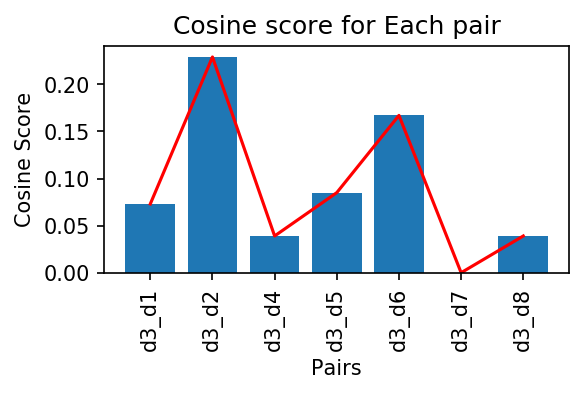

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,2),dpi=150)
plt.bar(pairs, height=cosine_new)
plt.plot(pairs,cosine_new, color='red')
plt.xticks(rotation='vertical')
plt.xlabel('Pairs')
plt.ylabel('Cosine Score')
plt.title('Cosine score for Each pair')
plt.show()

In [51]:
#Obtained after applying cosine similarity.
data={
'd1':{'surrender': 0.9031, 'other': 0.9031, 'propensity': 0.6021, 'hindering': 0.9031, 'habits': 0.426, 'for': 0.9031},
'd2': {'propensity': 0.6021, 'difficult': 0.9031, 'dies': 0.6021},
'd3': {'bad': 0.301, 'acquire': 0.426, 'habits': 0.426, 'dies': 0.6021, 'easily': 0.9031},
'd4': {'bad': 0.301, 'straightforwardly': 0.9031, 'routine': 0.6021, 'obtain': 0.9031, 'pass': 0.9031, 'away': 0.6021},
'd5': {'acquire': 0.426, 'practice': 0.6021, 'poor': 0.6021, 'simply': 0.6021, 'what': 0.6021, 'ends': 0.6021, 'approach': 0.9031},
'd6': {'bad': 0.301, 'to': 0.9031, 'acquire': 0.426, 'habits': 0.426, 'giving': 0.9031, 'ones': 0.9031, 'good': 0.9031, 'the': 0.9031},
'd7': {'learn': 0.9031, 'method': 0.9031, 'practice': 0.6021, 'poor': 0.6021, 'simply': 0.6021, 'what': 0.6021, 'ends': 0.6021},
'd8': {'bad': 0.301, 'getting': 0.9031, 'from': 0.9031, 'routine': 0.6021, 'away': 0.6021, 'clear': 0.9031}
}

In [52]:
sen_list = []
for k in data:
    sen_list.append(' '.join(data[k].keys()))
sen_list

['surrender other propensity hindering habits for',
 'propensity difficult dies',
 'bad acquire habits dies easily',
 'bad straightforwardly routine obtain pass away',
 'acquire practice poor simply what ends approach',
 'bad to acquire habits giving ones good the',
 'learn method practice poor simply what ends',
 'bad getting from routine away clear']

In [53]:
# Scikit Learn
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Create the Document Term Matrix
count_vectorizer = CountVectorizer(stop_words='english')
#count_vectorizer = CountVectorizer()
sparse_matrix = count_vectorizer.fit_transform(sen_list)

# OPTIONAL: We can visualise the sparse matrix in data frame to see word wise frequency
doc_term_matrix = sparse_matrix.todense()
#df = pd.DataFrame(doc_term_matrix, columns=count_vectorizer.get_feature_names(), index=['d1', 'd2', 'd3','d4','d5','d6','d7','d8'])
#print(df)

print(doc_term_matrix)

[[0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1]
 [0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0]
 [1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0]
 [1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0]
 [0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]]


In [54]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances
cosine_list = cosine_similarity(doc_term_matrix)
print(cosine_list)

[[1.         0.28867513 0.2236068  0.         0.         0.20412415
  0.         0.        ]
 [0.28867513 1.         0.25819889 0.         0.         0.
  0.         0.        ]
 [0.2236068  0.25819889 1.         0.18257419 0.18257419 0.54772256
  0.         0.2       ]
 [0.         0.         0.18257419 1.         0.         0.16666667
  0.         0.54772256]
 [0.         0.         0.18257419 0.         1.         0.16666667
  0.66666667 0.        ]
 [0.20412415 0.         0.54772256 0.16666667 0.16666667 1.
  0.         0.18257419]
 [0.         0.         0.         0.         0.66666667 0.
  1.         0.        ]
 [0.         0.         0.2        0.54772256 0.         0.18257419
  0.         1.        ]]


[0.22360679774997896, 0.25819888974716115, 0.18257418583505539, 0.18257418583505539, 0.5477225575051662, 0.0, 0.19999999999999998]


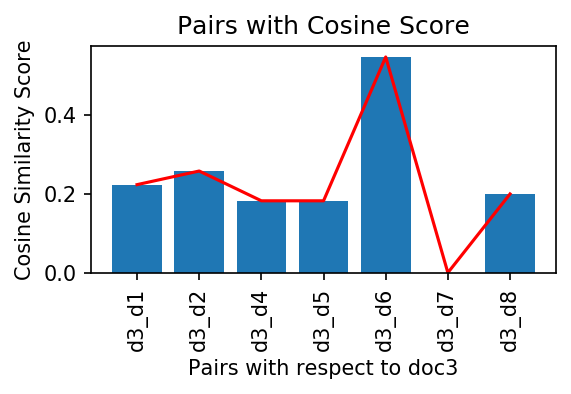

In [55]:
x_labels = [] 
for ele in docs_name:
    x = "_".join(ele)
    x_labels.append(x)

lst = list(cosine_list[2])
lst.pop(2)
print(lst)
plt.figure(figsize=(4,2),dpi=150)
plt.bar(x_labels,height= lst, width = 0.8)
plt.plot(x_labels,lst, color='red')
plt.xticks(rotation='vertical')
plt.xlabel('Pairs with respect to doc3')
plt.ylabel('Cosine Similarity Score')
plt.title('Pairs with Cosine Score')
plt.show()

In [56]:
euclidean_dis_list = euclidean_distances(doc_term_matrix)
euclidean_dis_list

array([[0.        , 2.23606798, 2.64575131, 3.16227766, 3.16227766,
        2.82842712, 3.16227766, 3.        ],
       [2.23606798, 0.        , 2.44948974, 3.        , 3.        ,
        3.        , 3.        , 2.82842712],
       [2.64575131, 2.44948974, 0.        , 3.        , 3.        ,
        2.23606798, 3.31662479, 2.82842712],
       [3.16227766, 3.        , 3.        , 0.        , 3.46410162,
        3.16227766, 3.46410162, 2.23606798],
       [3.16227766, 3.        , 3.        , 3.46410162, 0.        ,
        3.16227766, 2.        , 3.31662479],
       [2.82842712, 3.        , 2.23606798, 3.16227766, 3.16227766,
        0.        , 3.46410162, 3.        ],
       [3.16227766, 3.        , 3.31662479, 3.46410162, 2.        ,
        3.46410162, 0.        , 3.31662479],
       [3.        , 2.82842712, 2.82842712, 2.23606798, 3.31662479,
        3.        , 3.31662479, 0.        ]])

[2.6457513110645907, 2.449489742783178, 3.0, 3.0, 2.23606797749979, 3.3166247903554, 2.8284271247461903]


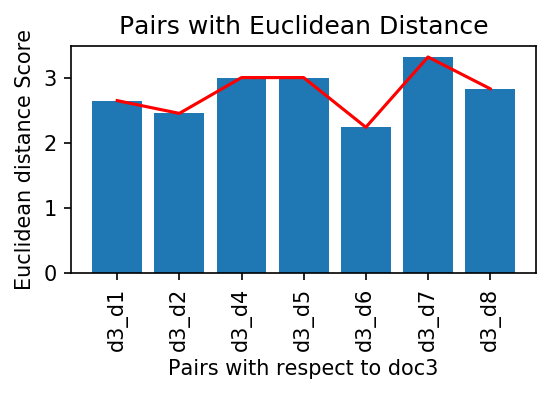

In [57]:
euc_lst = list(euclidean_dis_list[2])
euc_lst.pop(2)
print(euc_lst)

plt.figure(figsize=(4,2),dpi=150)
plt.bar(x_labels,height= euc_lst, width = 0.8)
plt.plot(x_labels,euc_lst, color='red')
plt.xticks(rotation='vertical')
plt.xlabel('Pairs with respect to doc3')
plt.ylabel('Euclidean distance Score')
plt.title('Pairs with Euclidean Distance')
plt.show()